# Phase equilibria

## Introduction

### Phase diagrams and the Clapeyron equation
Figure 1 shows how the pressure along a phase boundary varies with a change in temperature, in accordance with the Clapeyron equation. 

<p style='text-align: center;'>
<img src="Clapeyron.png" height="500" width="500"/>

__Figure 1__. Phase diagram of water and differential forms of the Clapeyron equation.  
</p>

### Integrated forms of the Clapeyron equation: Thomson and Clausius-Clapeyron
Integrating these equations takes two forms. One is known as the *Thomson equation*,

$$
P = P_3 + \frac {\Delta H_{fus}} {\Delta V_{fus}} ln( \frac T {T_3}) \ \ \ \ (1)
$$

where $T_3$ and $P_3$ indicate the *triple point*; we should note that this is an arbitrary choice; $T_3$ and $P_3$ could be replaced by any point on the phase boundary. Another form is the *Clausius-Clapeyron equation*, 

$$
P = P_3 \ exp \big (-\frac {\Delta H_{vap}}{nR} (\frac 1 T - \frac 1 {T_3}) \big ) \ \ \ \ (2)
$$

which works for the liquid-vapor phase boundary. The same form, but with a different enthalpy term is 

$$
P = P_3 \ exp \big (-\frac {\Delta H_{sub}}{nR} (\frac 1 T - \frac 1 {T_3}) \big ) \ \ \ \ (3)
$$

which works for the solid-vapor phase boundary.

### Semi-log plots
One more note about this -- many times, the pressures one is interested in looking at spans such a large range, that a *semi-log* plot is used (linear in temperature, logarithmic in pressure).


### Learning goals
- Develop hands-on experience with using the Clausius-Clapeyron and Thomson equations
- Gain some experience with semi-log plotting


In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [2]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J/mol/K'); print(R)

# Triple point of water
T3 = AssignQuantity(273.16,'K'); print(T3)
P3 = AssignQuantity(612,'Pa'); print(P3)

# Molar mass of water
M = AssignQuantity(18,'g/mol')

8.314 joule / kelvin / mole
273.16 kelvin
612 pascal


### Define the Thomson function
Below, we've defined a function that calculates a solid-liquid phase boundary. Input arguments are as follows:

- T, the temperature you want to integrate *to*
- T3, the triple point temperature
- P3, the triple point pressure
- DH, the enthalpy of fusion
- DV, the change in volume (liquid minus solid)
- R, the gas constant
- AssignQuantity (our unit registry function)

This function returns arrays of values (temperature and pressure) along the solid-liquid phase boundary.

In [3]:
def Thomson(T,T3,P3,DH,DV,R,AssignQuantity):
    T_array = AssignQuantity(np.linspace(T3,T),T.units)
    DH_over_DV = DH/DV
    DH_over_DV.ito('pascal')
    P_array = P3 + DH_over_DV*np.log(T_array/T3)
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)
    return T_array, P_array

### Solid -> liquid phase boundary using Thomson
In the cell below, supply the missing ingredients.

Molar volume of liquid: 18 centimeter ** 3 / mole
Molar volume of liquid in SI units: 1.8000000000000004e-05 meter ** 3 / mole
Molar volume of solid in SI units: 1.9800000000000007e-05 meter ** 3 / mole
Molar volume difference: -1.800000000000003e-06 meter ** 3 / mole
Units of resulting temperature: kelvin
Units of resulting pressure: pascal


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


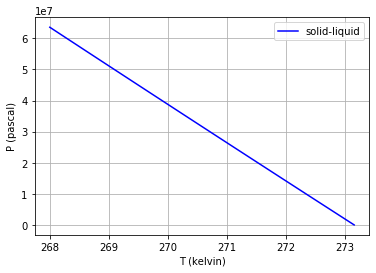

In [4]:
# Specify the temperature we want to integrate to, in units K
T = AssignQuantity(268,'K')

# Specify the enthalpy of fusion (we'll just assume the standard value at 298 K, 6 kJ/mol)
### BEGIN SOLUTION
DHfus = AssignQuantity(6,'kJ/mol')
### END SOLUTION

# Specify the volume of liquid water, 1 cm^3/g
V_liq_pergram = AssignQuantity(1,'cm^3/g') # 1 gram water has a volume of 1 cm^3

# Convert V_liq_pergram to cm^3/mol by multiplying by the molar mass of water; call the result V_liq
### BEGIN SOLUTION
V_liq = V_liq_pergram*M; print('Molar volume of liquid:', V_liq)
### END SOLUTION

# Convert V_liq to SI (m^3/mol)
### BEGIN SOLUTION
V_liq.ito('m^3/mol'); print('Molar volume of liquid in SI units:', V_liq)
### END SOLUTION

# Estimate the volume of ice as 10% more than that of liquid
V_sol = V_liq*1.1; print('Molar volume of solid in SI units:', V_sol)

# Get the change in volume (liquid minus solid); call the result DVfus
### BEGIN SOLUTION
DVfus = V_liq-V_sol; print('Molar volume difference:', DVfus)
### END SOLUTION

# Call Thompson
T_sl, P_sl = Thomson(T,T3,P3,DHfus,DVfus,R,AssignQuantity)

# Plot the solid->liquid phase boundary
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.grid(True)
plt.xlabel('T ('+str(T_sl.units)+')')
plt.ylabel('P ('+str(P_sl.units)+')')
plt.legend()

### Define the Clausius-Clapeyron function
Your task below is to finish the definition of the Clausius-Clapeyron equation. Input arguments are as follows:

- T, the temperature you want to integrate *to*
- T3, the triple point temperature
- P3, the triple point pressure
- DH, the enthalpy of sublimation or vaporization
- R, the gas constant
- AssignQuantity (our unit registry function)

This function shoud return arrays of values (temperature and pressure) along a solid-vapor or liquid-vapor phase boundary.

In [5]:
def Clausius_Clapeyron(T,T3,P3,DH,R,AssignQuantity):
    
### BEGIN SOLUTION
    T_array = AssignQuantity(np.linspace(T3,T),T.units)
    R.ito('J/mol/K')
    DH.ito('J/mol')
    P_array = P3*np.exp(-DH/R*(1/T_array-1/T3))
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)
### END SOLUTION

    return T_array, P_array

### Liquid -> vapor phase boundary using Clausius-Clapeyron
The cell below uses the Clausius_Clapeyron to compute the liquid-vapor phase boundary. Then it plots those points, along with the solid-liquid phase boundary.

Units of resulting temperature: kelvin
Units of resulting pressure: pascal


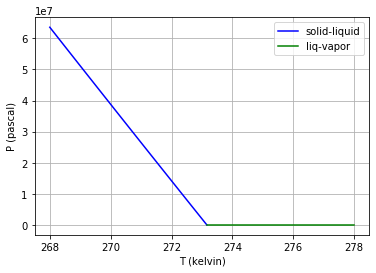

In [6]:
# Specify the temperature we want to integrate to
T = AssignQuantity(278,'K')

# Get the enthalpy of vaporization (liq->vapor) (we'll just assume the standard value at 298 K)
DHvap = AssignQuantity(44,'kJ/mol')

# Call Clausius_Clapeyron
T_lv, P_lv = Clausius_Clapeyron(T,T3,P3,DHvap,R,AssignQuantity)

# Plot the liquid->vapor phase boundary along with the solid->liquid one
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_lv.units)+')')
plt.ylabel('P ('+str(P_lv.units)+')')
plt.legend()

### Solid -> vapor phase boundary using Clausius-Clapeyron
In the cell below, use the Clausius_Clapeyron to compute the solid-vapor phase boundary. Then plot those points along with the solid-liquid and liquid-vapor phase boundaries.

Units of resulting temperature: kelvin
Units of resulting pressure: pascal


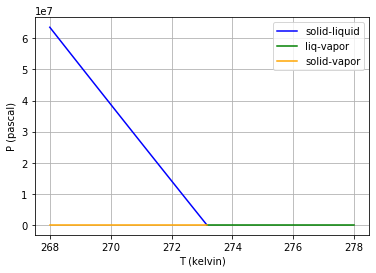

In [7]:
### BEGIN SOLUTION

# Specify the temperature we want to integrate to
T = AssignQuantity(268,'K')

# Get the enthalpy of sublimation (we'll just assume the standard value at 298 K)
DHsub = AssignQuantity(50,'kJ/mol')

# Call Clausius_Clapeyron
T_sv, P_sv = Clausius_Clapeyron(T,T3,P3,DHsub,R,AssignQuantity)

# Plot the solid-vapor phase boundary along with the liquid-vapor phase boundary
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()

### END SOLUTION

### Re-plotting on a semilog (in pressure) scale
Copy the plotting commands in your previous cell, but replace every instance of "plt.plot" with "plt.semilogy".

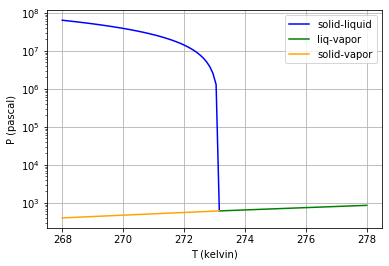

In [8]:
### BEGIN SOLUTION

# Plot the solid-vapor phase boundary along with the liquid-vapor phase boundary
plt.figure()
plt.semilogy(T_sl,P_sl,color='blue',label='solid-liquid')
plt.semilogy(T_lv,P_lv,color='green',label='liq-vapor')
plt.semilogy(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()

### END SOLUTION